In [1]:
from cgeniepy.foram import ForamModel as fm
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams["font.family"] = "Fira Sans"

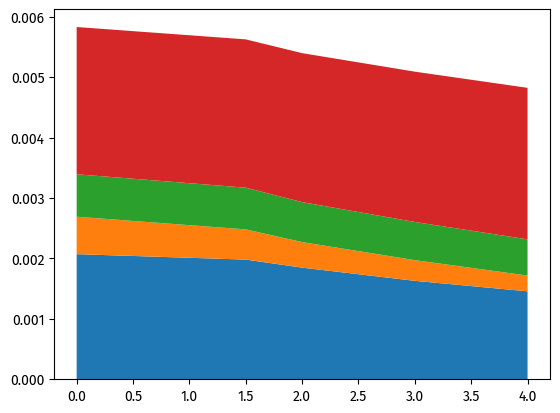

In [6]:
# Don't use the pre-industrial spinup, because it is averaged for 5k years for the last slice

mod_paths = [
    "../model/worjh2.RpCO2_Rp13CO2.Albani.0ka.historical",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.1p5deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.2deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.3deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.4deg",
]

fig, ax = plt.subplots(1, 1)

x_label = [0, 1.5, 2, 3, 4]
a,b,c,d = [],[],[],[]

for n, i in enumerate(mod_paths):
    bn = fm(i).select_foramtype("bn").biomass().isel(time=-1).sum().magnitude
    bs = fm(i).select_foramtype("bs").biomass().isel(time=-1).sum().magnitude
    sn = fm(i).select_foramtype("sn").biomass().isel(time=-1).sum().magnitude
    ss = fm(i).select_foramtype("ss").biomass().isel(time=-1).sum().magnitude
    a.append(bn)
    b.append(bs)
    c.append(sn)
    d.append(ss)

ax.stackplot(x_label, a, b, c, d)

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 5), sharex=True, sharey=True)

mod_paths = [
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.1p5deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.2deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.3deg",
    "../model/worjh2.RpCO2_Rp13CO2.Albani.2100.4deg",
]
for n, i in enumerate(mod_paths):
    time = fm(i).select_var("time").array.values
    bn, bs, sn, ss = [], [], [], []
    for j in range(8):
        a = fm(i).select_foramtype("bn").biomass().isel(time=j).sum().magnitude
        b = fm(i).select_foramtype("bs").biomass().isel(time=j).sum().magnitude
        c = fm(i).select_foramtype("sn").biomass().isel(time=j).sum().magnitude
        d = fm(i).select_foramtype("ss").biomass().isel(time=j).sum().magnitude

        bn.append(a)
        bs.append(b)
        sn.append(c)
        ss.append(d)
    axs.flat[n].stackplot(time,bn, bs, sn, ss)